<a href="https://colab.research.google.com/github/Kimsumin1234/textmining/blob/main/0_%EA%B0%9C%EB%85%90%EC%9E%A1%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 머신러닝을 하기 위해서 먼저 통계 차트를 구해본다

In [ ]:
!pip install koreanize_matplotlib

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# 한글 폰트 설정
import koreanize_matplotlib

import warnings
warnings.simplefilter(action='ignore')

### 형태소 분석을 위한 라이브러리 설치
- https://konlpy.org/ko/latest/index.html
- 한국어 정보처리를 위한 패키지
- 자연어 처리를 하기 쉽게 도와준다
- NLP : 자연어
- 한국어 품사태그 비교표 : https://docs.google.com/spreadsheets/d/1OGAjUvalBuX-oZvZ_-9tEfYD2gQe7hTGsgUpiiBSXI8/edit?gid=0#gid=0
- 형태소 분석기가 여러개가 있다
- 형태소 분석기 마다 로딩시간이 차이가 있지만 개인이 사용하는 컴퓨터 사양에 따라 또 달라진다

In [ ]:
!pip install konlpy --upgrade

### 데이터 로드

In [ ]:
df_news = pd.read_json('/content/gdrive/MyDrive/Colab Notebooks/텍스트마이닝/data/etnews.kr_facebook_2016-01-01_2018-08-01_4차 산업혁명.json')
df_news

,created_time,link,message,name,post_id,total_comments
0,2018-06-20 18:06:39,https://www.facebook.com/etnews.kr/videos/1981...,"6월의 스파크포럼 - ""미래 시대, 조직의 변화도 시작됐다!""\n\n스파크포럼은 현...","6월의 스파크포럼 - ""미래 시대, 조직의 변화도 시작됐다!""",4.078867e+30,3
1,2018-06-14 10:41:16,http://www.etnews.com/20180612000347,로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄...,기술력 갖춘 로봇기업 몸값 치솟는다,4.078867e+30,0
2,2018-04-10 17:42:00,http://www.etnews.com/20180409000360?mc=em_002...,4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...,휘청거리는 대한민국 '금융'...서민도 기업도 ICT도 실종,4.078867e+30,0
3,2018-03-05 12:05:00,https://goo.gl/qPEyAJ,공통 간판 공약은 '4차 산업혁명 선도 도시 구현'과 '가상화폐·블록체인 기술 활용...,지방선거 D-100 정책 공약 '4차산업혁명'에 초점,4.078867e+30,0
4,2018-02-05 17:20:01,http://www.etnews.com/20180205000237,이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일...,[알림]제2기 인공지능 최고위 과정 모집,4.078867e+30,0
5,2018-01-29 23:39:00,http://www.etnews.com/20180129000403?mc=em_003...,4차 산업혁명 모든 기술과 서비스 구현,첫 스마트시티 '부산·세종' 낙점...규제 프리존으로,4.078867e+30,0
6,2017-11-09 18:11:43,http://www.sek.co.kr/2017/nbf,"산업혁명의 나라, 영국엔 4차 산업혁명이 없다?\n한국-영국 경험과 지혜를 모으는 ...",미래비즈니스포럼 2017 : 손에 잡히는 4차 산업혁명,4.078867e+30,0
7,2017-10-25 13:08:49,https://www.facebook.com/etnews.kr/videos/1720...,[전자신문TV 라이브] SBA 신직업위크\n\n4차 산업혁명 시대의 경쟁력 확보와 ...,[전자신문TV 라이브] SBA 신직업위크,4.078867e+30,0
8,2017-10-06 11:50:00,http://www.etnews.com/20171005000056?mc=em_011...,혹시 우리나라도?~~4차 산업혁명 시대 떠오르는 일자리 전략으로 강추~~,"日, 인공지능 활용능력 자격시험 만든다",4.078867e+30,1
9,2017-09-25 15:30:00,http://www.etnews.com/20170924000106?mc=em_003...,4차 산업혁명 대응에 가장 강점 분야는 5세대 이동통신...건강한 산업 생태계 조성...,"김상조 공정위원장 “기업집단국, 조사국과 달라…'존경받는 기업' 만드는 게 핵심”",4.078867e+30,0


In [ ]:
df_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   created_time    19 non-null     datetime64[ns]
 1   link            19 non-null     object        
 2   message         19 non-null     object        
 3   name            19 non-null     object        
 4   post_id         19 non-null     float64       
 5   total_comments  19 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 1.0+ KB


In [ ]:
df_news['message']

0     6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현...
1     로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄...
2                       4차 산업혁명 시대 금융 산업 전반 점검해야 한다는...
3     공통 간판 공약은 '4차 산업혁명 선도 도시 구현'과 '가상화폐·블록체인 기술 활용...
4     이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일...
5                                 4차 산업혁명 모든 기술과 서비스 구현
6     산업혁명의 나라, 영국엔 4차 산업혁명이 없다?\n한국-영국 경험과 지혜를 모으는 ...
7     [전자신문TV 라이브] SBA 신직업위크\n\n4차 산업혁명 시대의 경쟁력 확보와 ...
8              혹시 우리나라도?~~4차 산업혁명 시대 떠오르는 일자리 전략으로 강추~~
9     4차 산업혁명 대응에 가장 강점 분야는 5세대 이동통신...건강한 산업 생태계 조성...
10    중앙부처 공무원 51.3% '4차 산업혁명 관련 가장 시급히 대응해야 할 기술적 과...
11    [전자신문TV 라이브] 직격인터뷰 - 서울산업진흥원(SBA) 주형철 대표이사\n\n...
12    4차 산업혁명 대응은 일자리 창출과 함께 문재인 정부 주요 국정 과제인 데도 우선순...
13    통합·개혁 행보에서 빠른 움직임을 보였지만 4차 산업혁명 등 신성장동력 창출에서는 ...
14    미래창조과학부가 주최하고 전자신문사, 한국경제신문, 한국정보통신진흥협회(KAIT) ...
15    [전자신문TV 라이브 예고]\n이번 전자신문TV는 4차 산업혁명과 과학기술 영상컨퍼...
16    대선 국면이지만 법안의 시급성 때문에 4차 산업혁명 대비 법제 개편 논의가 불붙을 ...
17                                     4차 산업혁명 시

### 형태소 분석기
- Okt

In [ ]:
# Okt

from konlpy.tag import Okt
okt = Okt()

In [ ]:
df_news['message'][0]

'6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다.'

In [ ]:
# " ".join() : 공백을 기준으로, 리스트에 들어있는 문자열들을 하나의 문자열로 처리

" ".join(df_news['message'])

'6월의 스파크포럼 - "미래 시대, 조직의 변화도 시작됐다!"\n\n스파크포럼은 현 사회의 사회문제 및 이슈를 제기하고, 그 이슈를 혁신적으로 해결하고자 하는 소셜이노베이터를 발굴, 지원하여 우리 사회 따뜻한 변화를 확산시키지 위해 만들어진 도전과 만남의 자리입니다.\n\n6월의 스파크포럼에서는 4차 산업혁명 시대의 기업조직과 조직문화를 살펴보고, 조직의 변화를 받아들이고 실험해나가는 사례를 통해 미래 시대 조직이 나아가야 할 방향을 함께 생각해보고자 합니다. 로봇이 4차 산업혁명 주요 성장 동력으로 떠오르면서 국내 로봇 기업에 재평가가 이뤄지고 있다는 분석입니다. 4차 산업혁명 시대 금융 산업 전반 점검해야 한다는... 공통 간판 공약은 \'4차 산업혁명 선도 도시 구현\'과 \'가상화폐·블록체인 기술 활용\' 등입니다. https://goo.gl/qPEyAJ 이번 과정은 4차 산업혁명 핵심 기술인 AI에 대한 통찰력과 알파고를 통해 우리 일상과 익숙해진 로봇, 빅데이터 산업 흐름을 알려줍니다. #인공지능 #최고위과정 #산학연최고전문가 https://goo.gl/jSZSNX 4차 산업혁명 모든 기술과 서비스 구현 산업혁명의 나라, 영국엔 4차 산업혁명이 없다?\n한국-영국 경험과 지혜를 모으는 ‘미래비즈니스포럼 2017’ 개최 [전자신문TV 라이브] SBA 신직업위크\n\n4차 산업혁명 시대의 경쟁력 확보와 일자리 창출의 해법을 신직업에서 찾고 있는 서울산업진흥원(SBA)이 자신들의 역량과 노력을 모두 담은 \'제 2회 신직업위크\'를 진행하고 있습니다.\n\n이번 전자신문TV라이브는 서울 대치동 SBA 신직업교육센터에서 강만구 신직업교육팀장과 서지윤 신직업리서치팀수석, 윤석원 테스트웍스 대표 등과 함께 \'제 2회 신직업위크\'와 최신 신직업트렌드를 알아보는 시간으로 마련했습니다. 많은 시청 바랍니다. \n\n#전자신문 #전자신문엔터 #전자신문TV #라이브 #소셜방송 #현장라이브 #손보련 #신직업위크 #서울산업진흥원 #SBA #신직업 #서울 #강만구 #서

In [ ]:
# 명사 추출

# okt.nouns(df_news['message'][0])
nouns = okt.nouns(" ".join(df_news['message']))

### 중복으로 들어가 있는 글자 빈도수 세기

In [ ]:
from collections import Counter

count = Counter(nouns)

In [ ]:
count

Counter({'스파크': 3,
         '포럼': 4,
         '미래': 3,
         '시대': 7,
         '조직': 4,
         '변화': 3,
         '시작': 1,
         '현': 1,
         '사회': 3,
         '문제': 1,
         '및': 1,
         '이슈': 2,
         '제기': 1,
         '그': 1,
         '혁신': 1,
         '해결': 1,
         '소셜': 1,
         '이노': 1,
         '베이': 1,
         '터': 1,
         '발굴': 1,
         '지원': 1,
         '우리': 2,
         '확산': 1,
         '위해': 2,
         '도전': 1,
         '만남': 1,
         '자리': 1,
         '차': 22,
         '산업혁명': 21,
         '기업': 3,
         '직문': 1,
         '실험': 1,
         '사례': 2,
         '통해': 4,
         '방향': 1,
         '생각': 1,
         '로봇': 3,
         '주요': 2,
         '성장': 1,
         '동력': 1,
         '국내': 2,
         '재': 1,
         '평가': 1,
         '분석': 1,
         '금융': 1,
         '산업': 8,
         '전반': 1,
         '점검': 1,
         '공통': 1,
         '간판': 1,
         '공약': 1,
         '선도': 1,
         '도시': 1,
         '구현': 2,
         '과

In [ ]:
# 데이터 프레임으로 만들기
# count.keys()
# count.values()
# for k, v in count.items():
#   print(k,v)

df_word = pd.DataFrame(
    {
        'word':count.keys(),
        'count':count.values(),
    }
)
df_word

,word,count
0,스파크,3
1,포럼,4
2,미래,3
3,시대,7
4,조직,4
...,...,...
242,교차,1
243,구글,1
244,애플,1
245,삼성,1


### 차트 그리기

In [ ]:
# 글자 1개짜리 는 제외 하기

df_word[df_word['word'].apply(lambda x:len(x) > 1)]

,word,count
0,스파크,3
1,포럼,4
2,미래,3
3,시대,7
4,조직,4
...,...,...
241,우려,1
242,교차,1
243,구글,1
244,애플,1


<Axes: xlabel='word'>

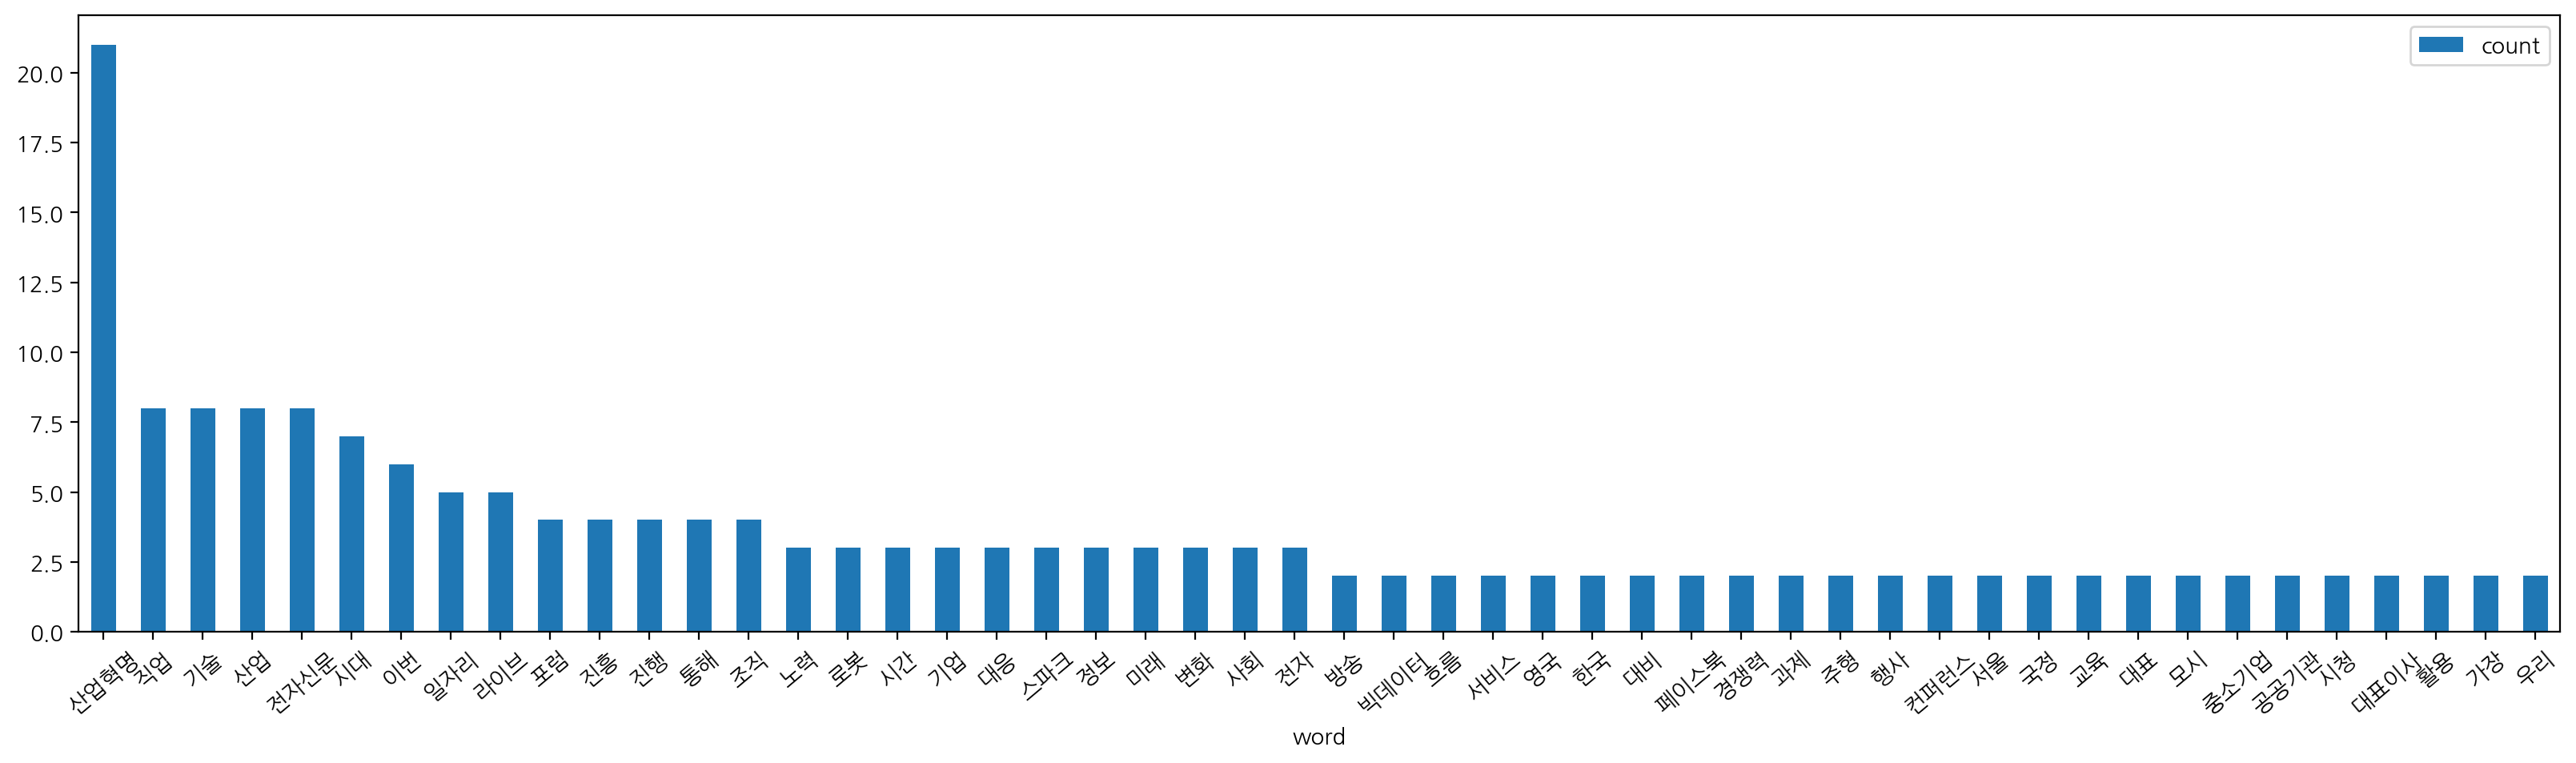

In [ ]:
# 정렬한후 50개 정도만 차트로 그리기

df_word[df_word['word'].apply(lambda x:len(x) > 1)].sort_values('count',ascending=False)[:50].plot.bar(x='word',y='count',figsize=(20,5),rot=40)

In [ ]:
!apt -qq -y install fonts-nanum

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 45 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 121913 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


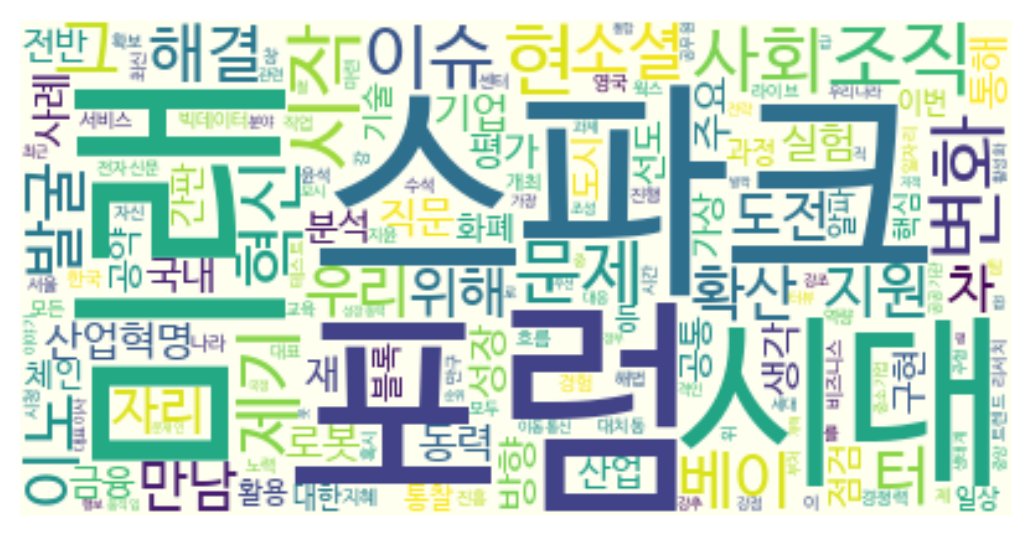

In [ ]:
from wordcloud import WordCloud

# stopwords=stop_word : 워드클라우드로 생성안했으면 하는 단어를 이런식으로 추가 가능
stop_words = ['및','과','은','는']
# font_path=font_path : 한글깨짐 방지
font_path = r'/Library/Fonts/NanumBarunGothic.ttf'

wordcloud = WordCloud(font_path, stopwords=stop_words, background_color='ivory').generate(' '.join(df_word['word']))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()